In [ ]:
!pip install yf

In [ ]:
!pip install ut.pdict

ERROR: Could not find a version that satisfies the requirement ut.pdict (from versions: none)
ERROR: No matching distribution found for ut.pdict


In [ ]:

import yfinance as yf
import pandas as pd


tesla = yf.Ticker("TSLA")


tesla_data = tesla.history(period="max")


tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla's revenue data (typically from macrotrends.net)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a GET request to the URL
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Find the revenue table
tables = soup.find_all('table')
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        tesla_revenue_table = table
        break

# Extract the data from the table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_revenue_table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) >= 2:  # Ensure there are at least two columns (date and revenue)
        date = cols[0].text
        revenue = cols[1].text.replace("$", "").replace(",", "")  # Clean revenue data
        tesla_revenue = tesla_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Convert Revenue to numeric values
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Display the last five rows
tesla_revenue.tail()

,Date,Revenue
58,2010-06-30,28.0
59,2010-03-31,21.0
60,2009-12-31,NaN
61,2009-09-30,46.0
62,2009-06-30,27.0


In [ ]:

import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the URL
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Find the revenue table
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        gme_revenue_table = table
        break

# Extract the data from the table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_revenue_table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) >= 2:  # Ensure there are at least two columns (date and revenue)
        date = cols[0].text
        revenue = cols[1].text.replace("$", "").replace(",", "")  # Clean revenue data
        gme_revenue = gme_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Convert Revenue to numeric values
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Display the last five rows
gme_revenue.tail()

,Date,Revenue
60,2010-01-31,3524
61,2009-10-31,1835
62,2009-07-31,1739
63,2009-04-30,1981
64,2009-01-31,3492


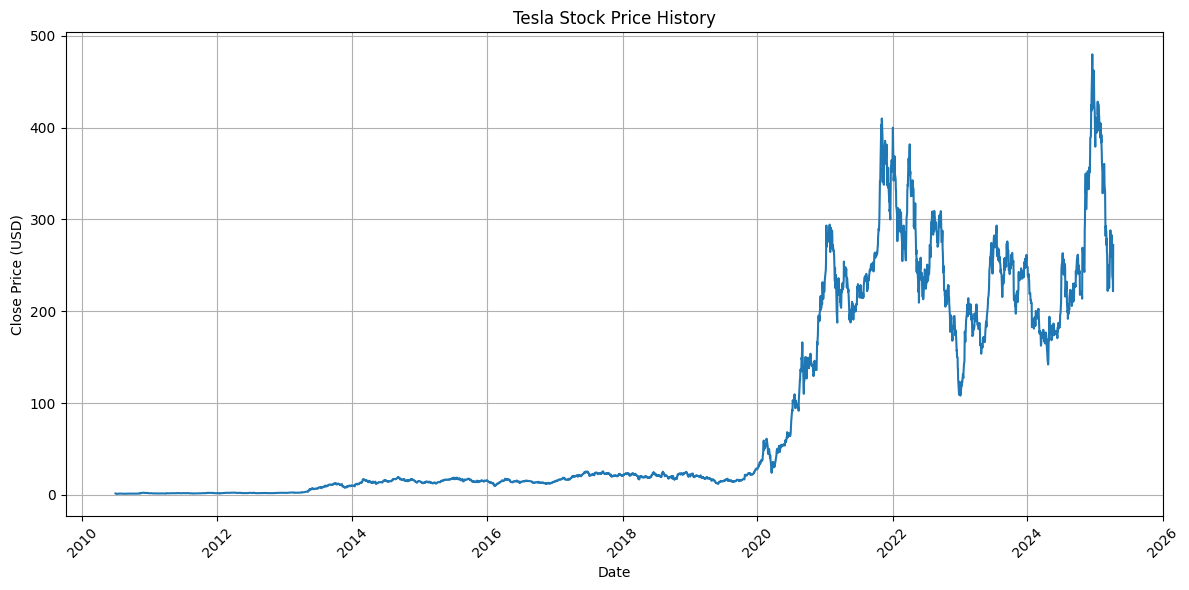

In [ ]:

import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price History')

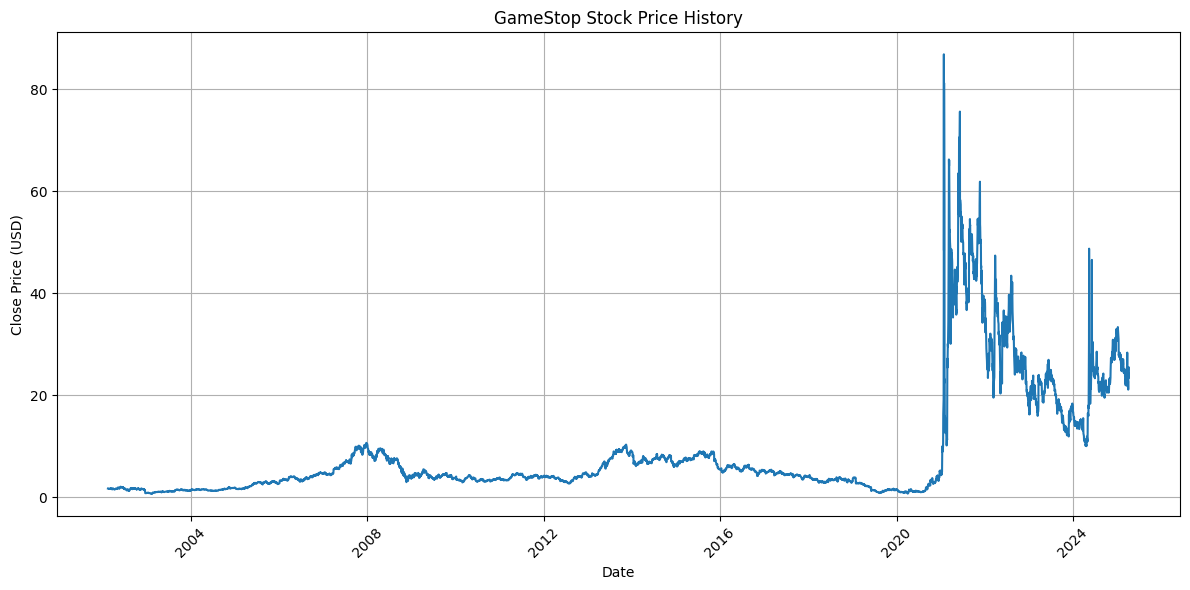

In [ ]:

import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


make_graph(gme_data, 'GameStop Stock Price History')